In [8]:
# Import the necessary packages
from matplotlib import pyplot as plt
import cv2
from imutils import displayImage, plot_histogram
import numpy as np
import seaborn as sns
sns.set()

In [9]:
image_path = 'images/beach.png'

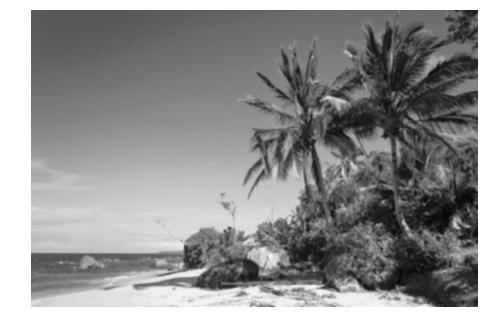

In [10]:
# Load the image, convert it to grayscale, and show it
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
displayImage(gray, shiftColor=False)

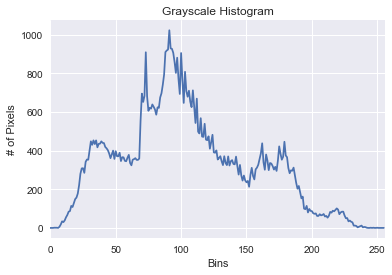

In [11]:
# Construct a grayscale histogram
# parameters:
# image list, channels, mask, bins, range
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

%matplotlib inline

# Plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

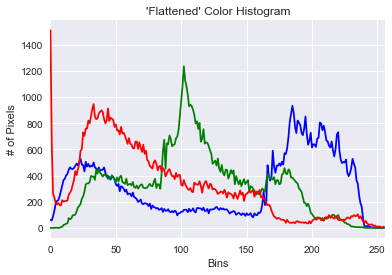

In [12]:
# computing a histogram for each channel of the image

# Grab the image channels, initialize the tuple of colors
# and the figure
chans = cv2.split(image)
colors = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

for (chan, color) in zip(chans, colors):
    # Create a histogram for the current channel and plot it
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
    plt.xlim([0, 256])

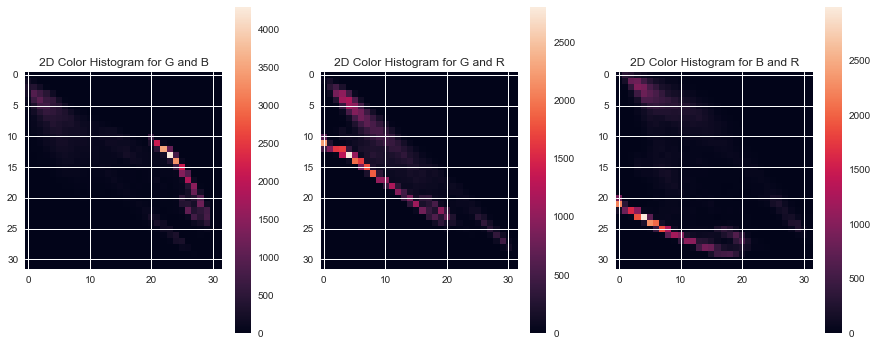

In [13]:
# Let's move on to 2D histograms -- I am reducing the
# number of bins in the histogram from 256 to 32 so we
# can better visualize the results
fig = plt.figure(figsize=(15,6))

# Plot a 2D color histogram for green and blue
ax = fig.add_subplot(131)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None,
    [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for G and B")
plt.colorbar(p)

# Plot a 2D color histogram for green and red
ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None,
    [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for G and R")
plt.colorbar(p)

# Plot a 2D color histogram for blue and red
ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None,
    [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for B and R")
plt.colorbar(p);

In [14]:
# Our 2D histogram could only take into account 2 out
# of the 3 channels in the image so now let's build a
# 3D color histogram (utilizing all channels) with 8 bins
# in each direction -- we can't plot the 3D histogram, but
# the theory is exactly like that of a 2D histogram, so
# we'll just show the shape of the histogram
hist = cv2.calcHist([image], [0, 1, 2],
    None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print("3D histogram shape: {}, with {} values".format(
    hist.shape, hist.flatten().shape[0]))

# Show our plots
plt.show()

3D histogram shape: (8, 8, 8), with 512 values


## Histogram equalization
Applied to grayscale images to improve contrast

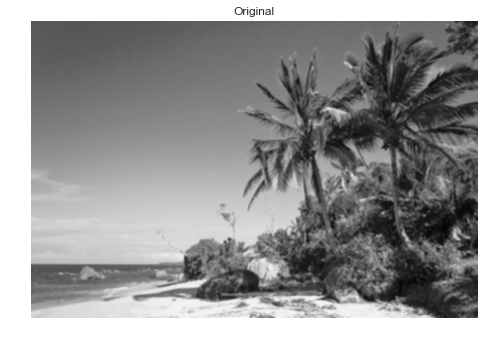

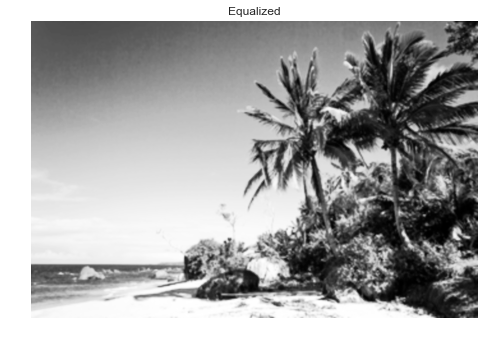

In [15]:
# Apply histogram equalization to stretch the constrast
# of our image
eq = cv2.equalizeHist(gray)
displayImage(gray, shiftColor=False, title='Original')
displayImage(eq, shiftColor=False, title='Equalized')

## Histograms and Masks

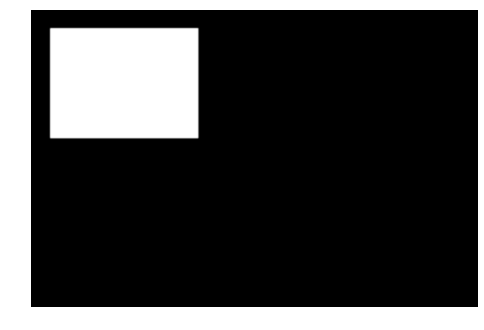

In [16]:
# Construct a mask for our image -- our mask will be BLACK for
# regions we want to IGNORE and WHITE for regions we want to
# EXAMINE. In this example we will be examining the foliage
# of the image, so we'll draw a white rectangle where the foliage
# is
mask = np.zeros(image.shape[:2], dtype = "uint8")
cv2.rectangle(mask, (15, 15), (130, 100), 255, -1)
displayImage(mask, shiftColor=False)

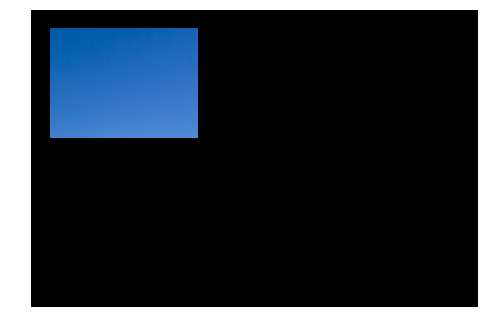

In [17]:
# What does masking our image look like?
masked = cv2.bitwise_and(image, image, mask = mask)
displayImage(masked)

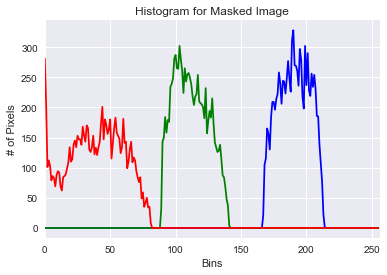

In [18]:
# Let's compute a histogram for our image, but we'll only include
# pixels in the masked region
plot_histogram(image, "Histogram for Masked Image", mask = mask)